### This jupyter notebook is to test the yahoo finance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [2]:
df= pd.read_csv("dataset_others_class.csv")

In [3]:
# Add date as a column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [4]:
df.dtypes

Date                  datetime64[ns, UTC]
CADUSD=X_Open                     float64
CADUSD=X_Close                    float64
CADUSD=X_High                     float64
CADUSD=X_Low                      float64
                             ...         
F_ROC                             float64
F_PVT                             float64
F_Bollinger_Upper                 float64
F_Bollinger_Lower                 float64
F_Close_pred_class                  int64
Length: 155, dtype: object

In [5]:
df.describe()

,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.0,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,...,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1.239000e+03,1239.000000,1239.000000,1239.000000
mean,0.758270,0.758274,0.760365,0.756011,0.0,-0.000031,0.001219,0.001250,0.001219,0.001247,...,50.632277,49.573757,-50.426243,0.010202,0.010207,0.701824,9.810693e+07,13.137487,10.882628,0.488297
std,0.028506,0.028502,0.028571,0.028493,0.0,0.003273,0.001929,0.001986,0.000541,0.000645,...,17.257854,30.442636,30.442636,0.421140,0.395197,10.283960,6.143931e+07,3.925723,3.126512,0.500065
min,0.690026,0.689741,0.693371,0.681826,0.0,-0.012518,0.000000,0.000000,0.000048,0.000016,...,8.699250,0.000000,-100.000000,-1.071207,-0.953758,-40.504446,-8.463164e+07,5.333265,3.663582,0.000000
25%,0.735730,0.735730,0.737450,0.733856,0.0,-0.001901,0.000000,0.000000,0.000858,0.000816,...,39.139508,22.560469,-77.439531,-0.207560,-0.203092,-5.108400,6.438576e+07,11.193982,9.229279,0.000000
50%,0.750971,0.750971,0.753029,0.748895,0.0,-0.000026,0.000000,0.000026,0.001170,0.001164,...,49.948542,48.717950,-51.282050,0.000769,0.007859,0.130716,1.154782e+08,13.085400,11.185846,0.000000
75%,0.783610,0.783549,0.786046,0.780604,0.0,0.001852,0.001852,0.001901,0.001552,0.001510,...,63.219746,77.966057,-22.033943,0.241124,0.230658,6.640243,1.355955e+08,14.860102,12.242399,1.000000
max,0.830599,0.830703,0.832778,0.829009,0.0,0.012381,0.012381,0.012518,0.003353,0.004876,...,92.692054,100.000000,-0.000000,1.382432,1.213766,38.490564,2.314456e+08,26.710337,19.065638,1.000000


In [6]:
df.head()

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
0,2019-12-12 00:00:00+00:00,0.759169,0.759146,0.759878,0.758058,0,0.003345,0.003345,0.00000,0.001068,...,79.634870,93.220336,-6.779664,0.044498,0.022817,3.555552,2.126954e+06,9.246596,8.693404,0
1,2019-12-13 00:00:00+00:00,0.760323,0.760300,0.760341,0.757363,0,0.001154,0.001154,0.00000,0.001054,...,67.259540,72.881227,-27.118773,0.051915,0.028691,2.441724,1.785741e+06,9.278143,8.705857,1
2,2019-12-16 00:00:00+00:00,0.758426,0.758530,0.762602,0.758426,0,-0.001770,0.000000,0.00177,0.001054,...,75.173527,100.000000,-0.000000,0.067770,0.036565,3.186813,2.519657e+06,9.349882,8.678118,0
3,2019-12-17 00:00:00+00:00,0.759728,0.759705,0.760688,0.758443,0,0.001175,0.001175,0.00000,0.001137,...,75.173527,96.721391,-3.278609,0.079264,0.045155,3.642383,2.519657e+06,9.409738,8.662262,1
4,2019-12-18 00:00:00+00:00,0.759821,0.759925,0.763202,0.759031,0,0.000219,0.000219,0.00000,0.001015,...,80.927645,96.103928,-3.896072,0.097567,0.055687,5.882350,3.252967e+06,9.498060,8.637940,0


In [7]:
end_date = df['Date'].max()
start_date = end_date - pd.DateOffset(months=2)
df_last_2_months = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 2: Prepare features (X) and target (y)
X = df_last_2_months.drop(columns=['Date',  'F_Bollinger_Upper', 'F_Bollinger_Lower'])
y = df_last_2_months['F_Close_pred_class']

In [8]:
# Standardize and remove skewness
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X_scaled)

In [9]:
# Step 3: Split data - keep the last 7 days as an unseen test set
split_index = len(X_transformed) - 7
X_train_val, X_unseen_test = X_transformed[:split_index], X_transformed[split_index:]
y_train_val, y_unseen_test = y[:split_index], y[split_index:]

In [10]:
print(np.isnan(X_train_val).sum())  # Check for NaN in training data
print(np.isnan(X_unseen_test).sum())   # Check for NaN in test data

0
0


In [11]:
tscv = TimeSeriesSplit(n_splits=5)

In [12]:
# Deftine the parameter grid for grid sed
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'gamma': [0.01, 0.1, 0.2, 0.5]
}
svc = SVC()


grid_search = GridSearchCV(svc, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)
best_params = grid_search.best_params_
# Train the model with the best parameters
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train_val, y_train_val)
## Make predictions: on the test set (i.e. last week)
predictions = best_svc_model.predict(X_unseen_test)
mse = mean_squared_error(y_unseen_test,predictions)

In [13]:
print("Best Hyperparameters",best_params)
print("Mean Squared Error",mse)

Best Hyperparameters {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Mean Squared Error 0.0


In [14]:
# Chosen model
modelSVC = SVC(kernel='linear', C=1, gamma=0.01)

In [15]:
# checking 
modelSVC.fit(X_train_val, y_train_val)
## Make predictions: on the test set (i.e. last week)
predictions = modelSVC.predict(X_unseen_test)
mse = mean_squared_error(y_unseen_test,predictions)
print("Mean Squared Error",mse)

Mean Squared Error 0.0


In [16]:
from sklearn.metrics import accuracy_score
unseen_test_accuracy = accuracy_score(y_unseen_test,predictions)
print(unseen_test_accuracy)

1.0


ValueError: x and y must have same first dimension, but have shapes (2,) and (7,)

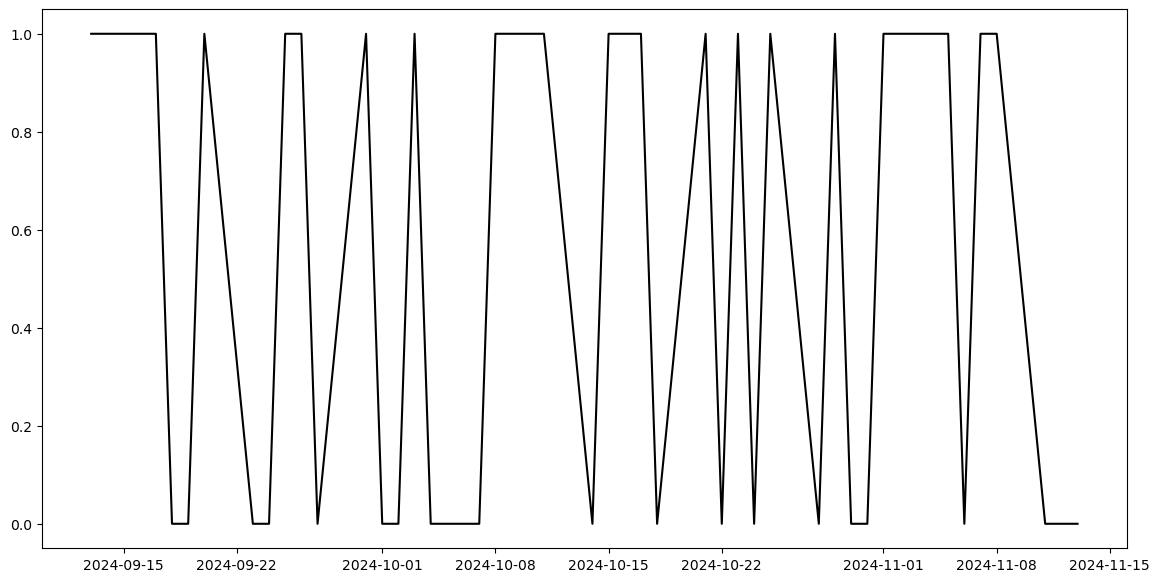

In [17]:
# Step 7: Forecast the next 7 days with a confidence interval
z = 2
future_z_days = X_transformed[-z:]  # Use the last week for forecasting
future_predictions = modelSVC.predict(future_z_days)
# Calculate confidence interval (simple approximation based on prediction standard deviation)
std_dev = np.std(predictions - y_unseen_test)
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# # Plot the results
plt.figure(figsize=(14, 7))
# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual DNZOY_Close_pred", color='black')
# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-z:], predictions, label="Unseen Test Prediction", color='blue')
# Future forecast
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=z)
plt.plot(future_dates, future_predictions, label="Future 10-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

plt.xlabel("Date")
plt.ylabel("DNZOY Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

## Some commodity tickers

- gold: SB=F
- Crude Oil: CL=F
- Silver: XAG=

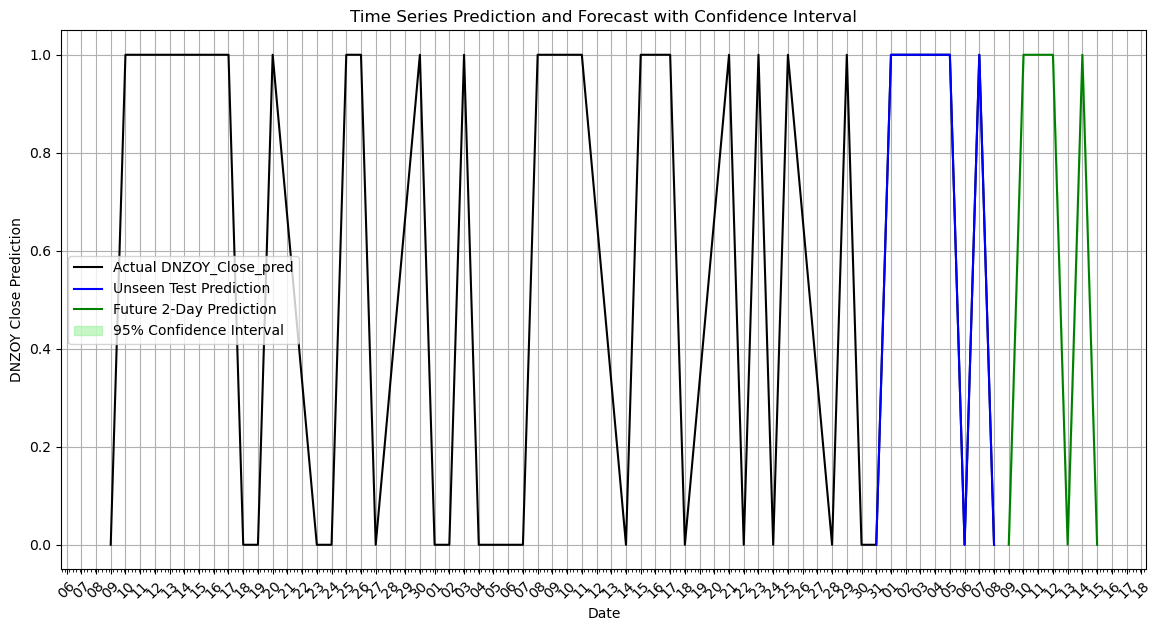

In [ ]:
import matplotlib.dates as mdates

# Step 7: Forecast the next 2 days with a confidence interval
z = 7  # Set forecast period to 2 days
future_z_days = X_transformed[-z:]  # Use the last 2 days for forecasting
future_predictions = modelSVC.predict(future_z_days)

# Calculate confidence interval (simple approximation based on prediction standard deviation)
std_dev = np.std(predictions - y_unseen_test)
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# Plot the results
plt.figure(figsize=(14, 7))

# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual DNZOY_Close_pred", color='black')

# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-z:], predictions, label="Unseen Test Prediction", color='blue')

# Future forecast for the next 2 days
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=z)
plt.plot(future_dates, future_predictions, label="Future 2-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

# Plot styling
plt.xlabel("Date")
plt.ylabel("DNZOY Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)

# Set grid for each day and format date to show only the day
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major grid lines for each day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor grid lines every 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format x-axis labels by day only
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()
